<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_Anomaly_Detection_in_Cyber_Security_Martin_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💪 challenge: Anomaly Detection in Cyber Security
The KDD99 dataset is a well known benchmark for anomaly detection, using IT security data with the goal of intrusion detection.


#obtain the data, 
either from its original source or from the datasets module of the scikit-learn library

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html#sklearn.datasets.fetch_kddcup99
https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch
https://scikit-learn.org/stable/datasets/real_world.html
https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html#sklearn.datasets.fetch_kddcup99

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

https://www.programcreek.com/python/example/117646/sklearn.datasets.fetch_kddcup99

https://kdd.ics.uci.edu/databases/kddcup99/task.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import datasets
from sklearn.ensemble import IsolationForest

In [2]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=c7bbad65fe0e03273086a9f0c67052805cc602887768700a33b26f045dbf36f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-9mo_lx86/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [4]:
import pandas_profiling as pd_prof

In [5]:
#X, y = sklearn.datasets.fetch_kddcup99(subset=None, data_home=None, shuffle=False, random_state=None, percent10=True, download_if_missing=True, return_X_y=False, as_frame=False)
#X, y = fetch_kddcup99(subset='SA', percent10=small, return_X_y=True)
#bunch_of_data = sklearn.datasets.fetch_kddcup99(subset=None, data_home=None, shuffle=False, random_state=None, percent10=True, download_if_missing=True, return_X_y=False)

In [6]:
pip install scikit-learn==0.24

In [7]:
sklearn.__version__

'0.24.0'

In [8]:
kdd99_bunch = datasets.fetch_kddcup99(
    as_frame=True,
    subset="SF"
)

#explore the data

In [9]:
kdd99_bunch['DESCR']

'.. _kddcup99_dataset:\n\nKddcup 99 dataset\n-----------------\n\nThe KDD Cup \'99 dataset was created by processing the tcpdump portions\nof the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,\ncreated by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset\'s\nhomepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was\ngenerated using a closed network and hand-injected attacks to produce a\nlarge number of different types of attack with normal activity in the\nbackground. As the initial goal was to produce a large training set for\nsupervised learning algorithms, there is a large proportion (80.1%) of\nabnormal data which is unrealistic in real world, and inappropriate for\nunsupervised anomaly detection which aims at detecting \'abnormal\' data, i.e.:\n\n* qualitatively different from normal data\n* in large minority among the observations.\n\nWe thus transform the KDD Data set into two different data sets: SA and SF.\n\n* SA is obtain

In [10]:
kdd99_bunch['target'].unique()

array([b'normal.', b'buffer_overflow.', b'loadmodule.', b'perl.',
       b'guess_passwd.', b'ipsweep.', b'ftp_write.', b'back.', b'imap.',
       b'phf.', b'multihop.', b'warezmaster.', b'satan.', b'warezclient.',
       b'spy.', b'rootkit.'], dtype=object)

In [11]:
df = kdd99_bunch["data"]

In [12]:
df['target']=kdd99_bunch['target']

In [13]:
df

,duration,service,src_bytes,dst_bytes,target
0,-2.30259,b'http',5.19905,8.60339,b'normal.'
1,-2.30259,b'http',5.47688,6.18641,b'normal.'
2,-2.30259,b'http',5.46001,7.19826,b'normal.'
3,-2.30259,b'http',5.38953,7.19826,b'normal.'
4,-2.30259,b'http',5.38036,7.61683,b'normal.'
...,...,...,...,...,...
73232,-2.30259,b'http',5.73689,7.53961,b'normal.'
73233,-2.30259,b'http',5.64226,7.7346,b'normal.'
73234,-2.30259,b'http',5.3137,7.09016,b'normal.'
73235,-2.30259,b'http',5.67367,7.09016,b'normal.'


In [14]:
#pd_prof.ProfileReport(df, minimal=True)

from the report there are some Warnings:

Dataset has 19779 (27.0%) duplicate rows	Duplicates
service is an unsupported type, check if it needs cleaning or further analysis

therefore the data needs cleaning

# clean the data

In [15]:
df.shape

(73237, 5)

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(53491, 5)

In [18]:
df['service'] = df['service'].apply(lambda x: x.decode("utf-8"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df['target'] = df['target'].apply(lambda x: x.decode("utf-8"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df

,duration,service,src_bytes,dst_bytes,target
0,-2.30259,http,5.19905,8.60339,normal.
1,-2.30259,http,5.47688,6.18641,normal.
2,-2.30259,http,5.46001,7.19826,normal.
3,-2.30259,http,5.38953,7.19826,normal.
4,-2.30259,http,5.38036,7.61683,normal.
...,...,...,...,...,...
73232,-2.30259,http,5.73689,7.53961,normal.
73233,-2.30259,http,5.64226,7.7346,normal.
73234,-2.30259,http,5.3137,7.09016,normal.
73235,-2.30259,http,5.67367,7.09016,normal.


In [21]:
#pd_prof.ProfileReport(df,minimal=True)

## transforme the data

In [22]:
df['target'] = df['target'].map(lambda x: 1 if x=='normal.' else  0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df['target'].unique()

array([1, 0])

In [24]:
service_lst = df["service"].unique()

In [25]:
service_dict = dict((service_lst[i],i) for i in range(0, len(service_lst)))

In [26]:
df['service'] = df['service'].map(service_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
for i in df.columns:
  df[i] = df[i].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## can you already spot anomalies by visualizing the data?

not really, some bytes values are negative, but can't say what that mean. -> Need to ask the provider of the data

the plot dosen't provid any further information

In [28]:
#import seaborn as sns
#plt.figure(figsize=(32,32))
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(df,hue="target",vars=["duration", "service", "src_bytes", "dst_bytes"])
#plt.show()

#build and evaluate an anomaly detector

##model training

In [29]:
from sklearn.ensemble import IsolationForest
import sklearn.model_selection as ms

In [ ]:
df_train, df_test = ms.train_test_split(df, test_size=0.2, random_state=42)

In [58]:
iForest = IsolationForest()
y_pred_train = iForest.fit_predict(df_train[["duration", "service", "src_bytes", "dst_bytes"]].to_numpy())

In [67]:
#convert_labels = lambda y: (y < 0).astype(int)
# df target ;  1 if x=='normal.' else  0
# iF Returns; -1 for outliers and 1 for inliers.
#convert_predict_to_target = lambda x: 0 if (x==-1) else 1
convert_predict_to_target = lambda y: (y == 1).astype(int)

In [68]:
y_pred_train = convert_predict_to_target(y_pred_train)

In [70]:
y_true_train = df_train['target'].astype(int)

##model performance evaluation train

In [39]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [40]:
#from sklearn.metrics import classification_report

#target_names = ['true label', 'predict label']
#print(classification_report(y_true, y_pred, target_names=target_names))

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_true_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.08      1.00      0.14       358
           1       1.00      0.90      0.95     42434

    accuracy                           0.90     42792
   macro avg       0.54      0.95      0.54     42792
weighted avg       0.99      0.90      0.94     42792



In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [93]:
confusion_matrix(y_true_train, y_pred_train)

array([[  358,     0],
       [ 4385, 38049]])

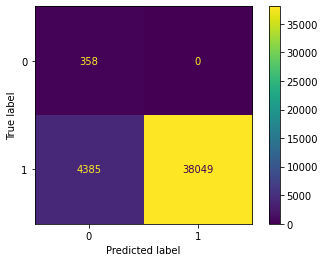

In [94]:
ConfusionMatrixDisplay(confusion_matrix(y_true_train, y_pred_train)).plot()

### model test

In [84]:
y_pred_test = iForest.predict(df_test[["duration", "service", "src_bytes", "dst_bytes"]].to_numpy())

In [85]:
y_pred_test = convert_predict_to_target(y_pred_test)

In [86]:
y_true_test = df_test['target'].astype(int)

####model performance evaluation test

In [87]:
print(classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        81
           1       1.00      0.90      0.95     10618

    accuracy                           0.90     10699
   macro avg       0.54      0.95      0.54     10699
weighted avg       0.99      0.90      0.94     10699



In [90]:
confusion_matrix(y_true_test, y_pred_test)

array([[  81,    0],
       [1072, 9546]])

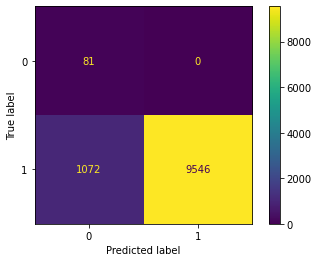

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_true_test, y_pred_test)).plot()

#build and evaluate an anomaly detector change 

##model training

In [ ]:
from sklearn.ensemble import IsolationForest
import sklearn.model_selection as ms

In [95]:
df_train, df_test = ms.train_test_split(df, test_size=0.2, random_state=42)

In [96]:
iForest = IsolationForest(contamination=0.01)
y_pred_train = iForest.fit_predict(df_train[["duration", "service", "src_bytes", "dst_bytes"]].to_numpy())

In [97]:
#convert_labels = lambda y: (y < 0).astype(int)
# df target ;  1 if x=='normal.' else  0
# iF Returns; -1 for outliers and 1 for inliers.
#convert_predict_to_target = lambda x: 0 if (x==-1) else 1
convert_predict_to_target = lambda y: (y == 1).astype(int)

In [98]:
y_pred_train = convert_predict_to_target(y_pred_train)

In [99]:
y_true_train = df_train['target'].astype(int)

##model performance evaluation train

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_true_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.23      0.27      0.25       358
           1       0.99      0.99      0.99     42434

    accuracy                           0.99     42792
   macro avg       0.61      0.63      0.62     42792
weighted avg       0.99      0.99      0.99     42792



In [102]:
confusion_matrix(y_true_train, y_pred_train)

array([[   98,   260],
       [  330, 42104]])

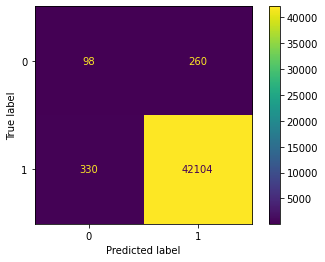

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_true_train, y_pred_train)).plot()

### model test

In [104]:
y_pred_test = iForest.predict(df_test[["duration", "service", "src_bytes", "dst_bytes"]].to_numpy())

In [105]:
y_pred_test = convert_predict_to_target(y_pred_test)

In [106]:
y_true_test = df_test['target'].astype(int)

####model performance evaluation test

In [107]:
print(classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.20      0.28      0.23        81
           1       0.99      0.99      0.99     10618

    accuracy                           0.99     10699
   macro avg       0.60      0.64      0.61     10699
weighted avg       0.99      0.99      0.99     10699



In [108]:
confusion_matrix(y_true_test, y_pred_test)

array([[   23,    58],
       [   92, 10526]])

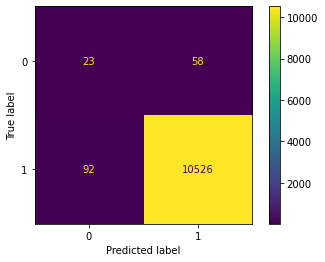

In [109]:
ConfusionMatrixDisplay(confusion_matrix(y_true_test, y_pred_test)).plot()

# the end

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])


In [ ]:
 from sklearn.metrics import recall_score
 recall_score(y_true,y_pred,average='micro')

In [ ]:
#recall_score(y_true,y_pred)

In [ ]:
recall_score

In [ ]:
#classification_report(y_true, y_pred, target_names=target_names)
classification_report(y_true, y_pred)

In [ ]:
cm = confusion_matrix(y_true, y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_true,y_pred,average='micro')

In [ ]:
 from sklearn.metrics import recall_score
 recall_score(y_true,y_pred,average='micro')

In [ ]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
(tn, fp, fn, tp)